In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Cargar los datos desde el archivo CSV
df = pd.read_csv("Cleaned-Data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

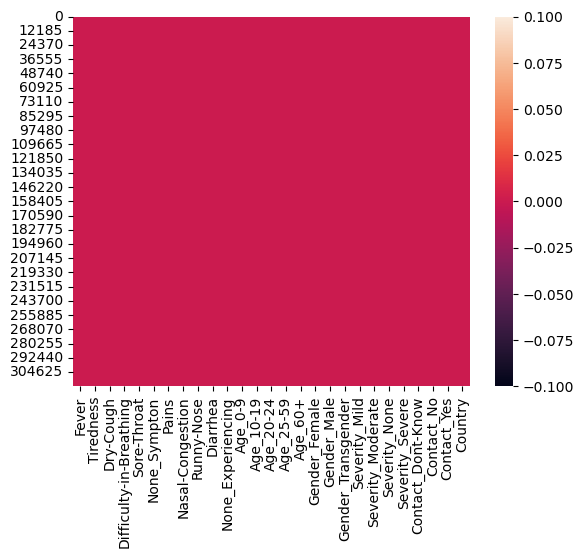

In [5]:
# Realizar análisis exploratorio de datos
print(df.info())
sns.heatmap(df.isnull())
df.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis=1, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(df, test_size=0.3, random_state=0)
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [6]:
# Función para evaluar el rendimiento del modelo
def perform(y_pred):
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

Resultados de Árbol de Decisión:
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

[[71256     0]
 [    0 23784]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



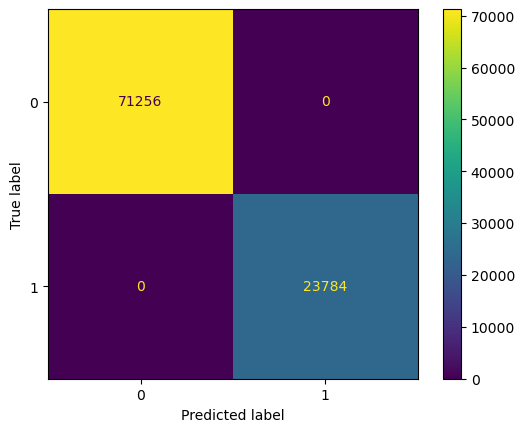

In [7]:
# Modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
print("Resultados de Árbol de Decisión:")
perform(y_pred_dt)
print(classification_report(y_test, y_pred_dt))

[Text(0.5, 0.75, 'Severity_Severe <= 0.5\ngini = 0.375\nsamples = 221760\nvalue = [166344, 55416]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 166344\nvalue = [166344, 0]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 55416\nvalue = [0, 55416]\nclass = 1')]

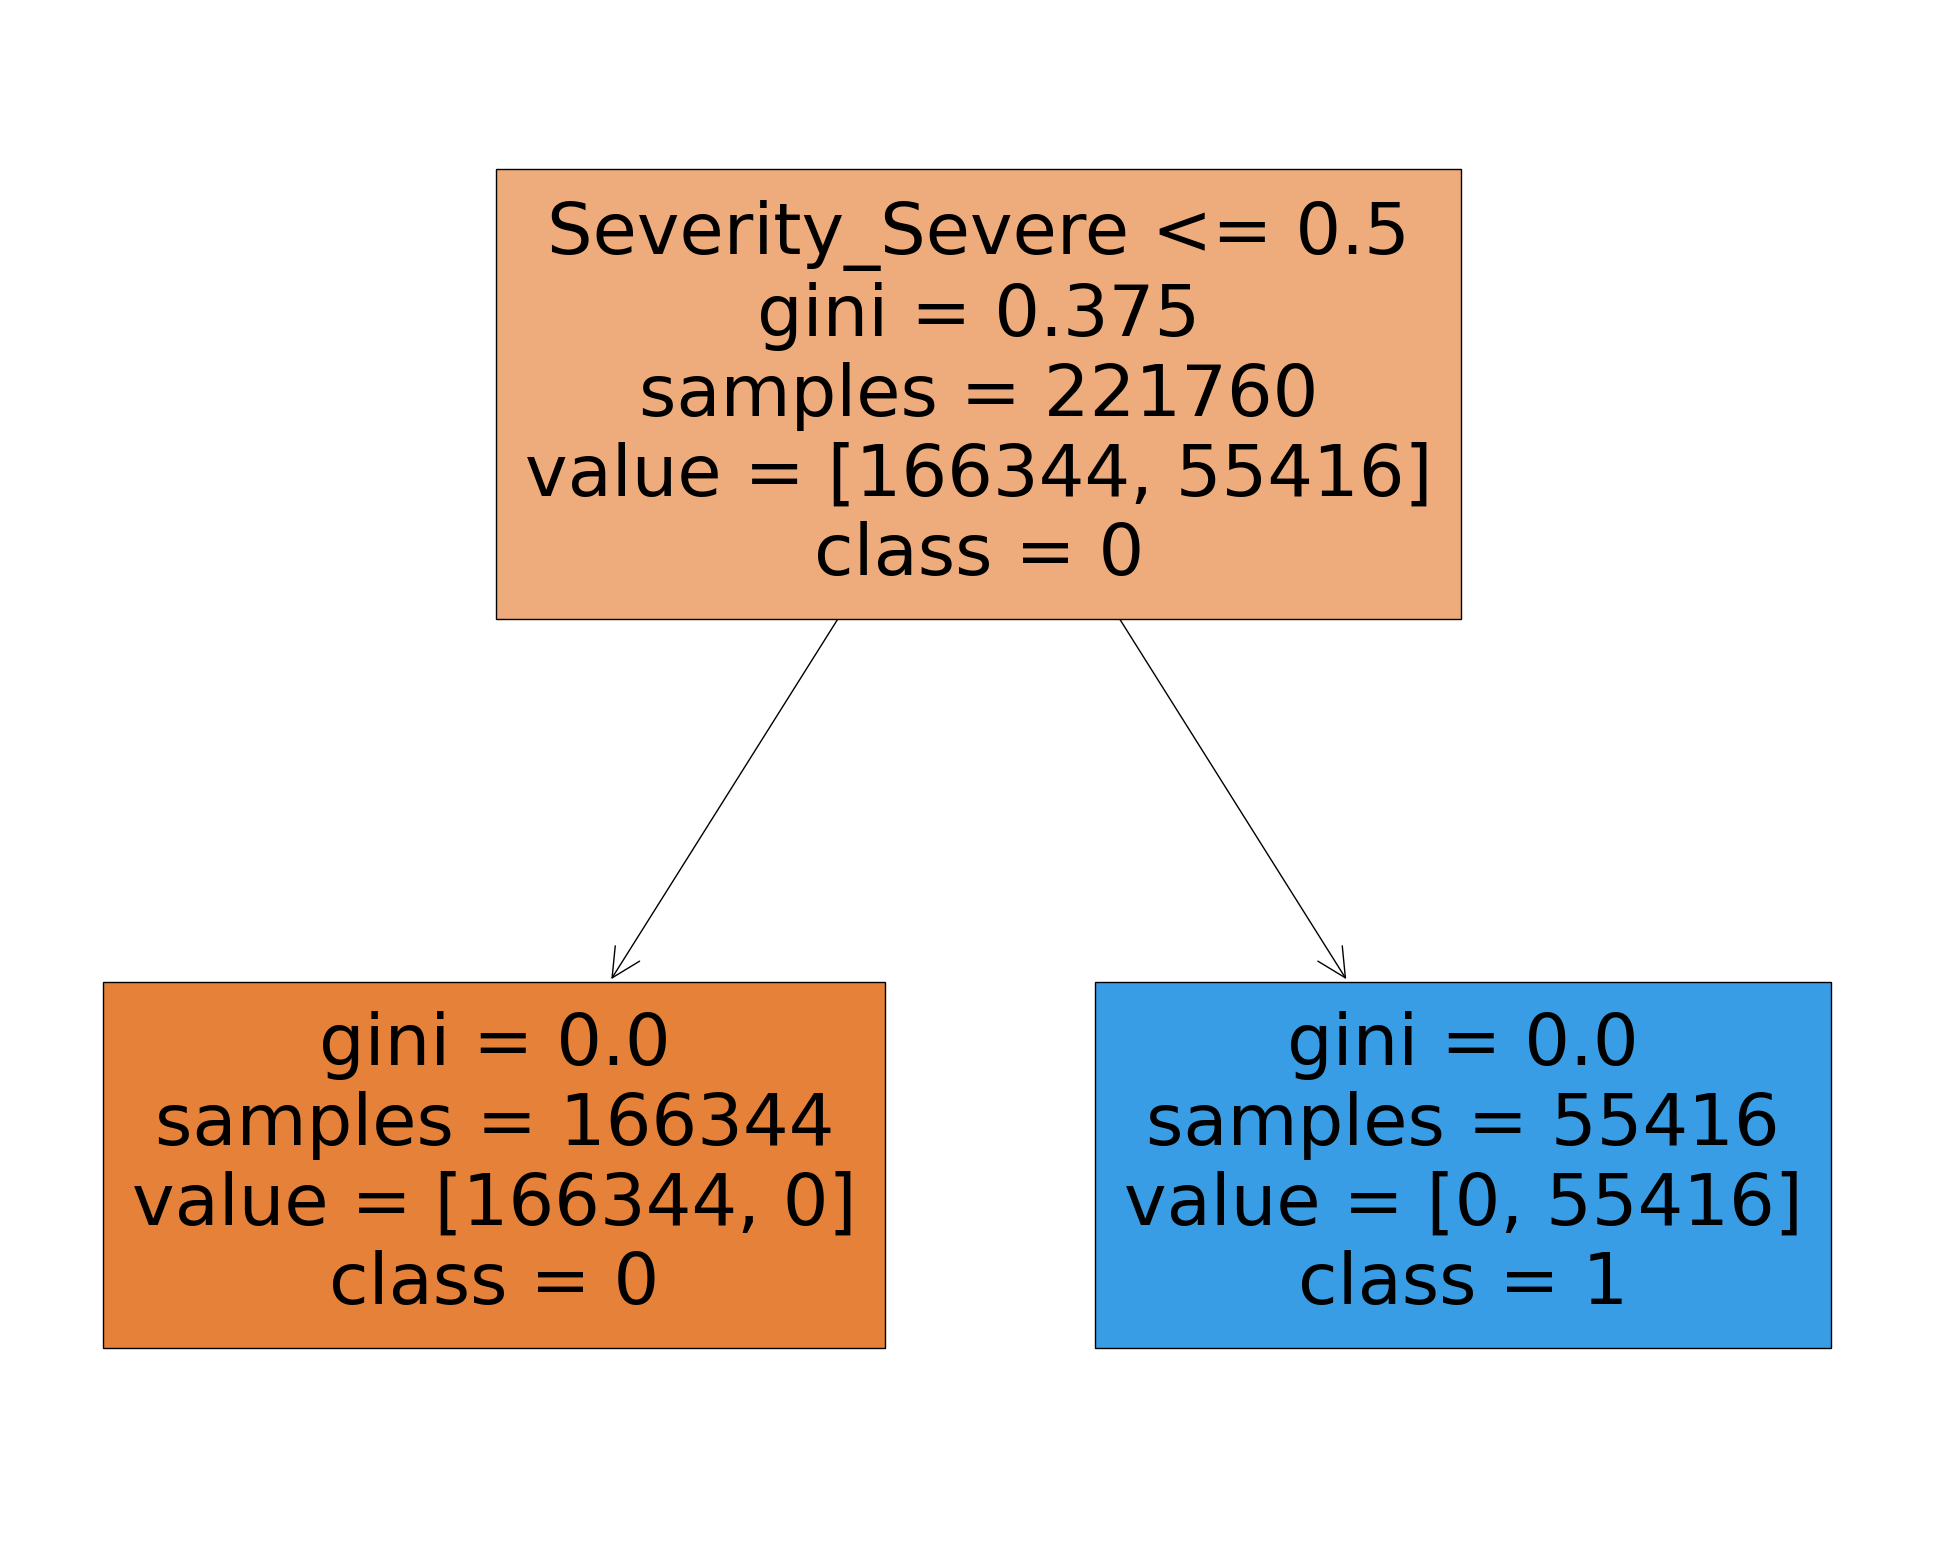

In [10]:
# Visualización del Árbol de Decisión
feature_names = df.columns[0:11].tolist()  # Convierte el índice a una lista
viz = df.copy()
viz["Severity_Severe"] = viz["Severity_Severe"].values.astype(str)
target_names = viz['Severity_Severe'].unique().tolist()
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names=feature_names, class_names=target_names, filled=True, rounded=False)


